In [ ]:
# Data Cleaning

In [7]:
import numpy as np
import requests
import json
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
baseURL = "https://newsapi.org/v2/everything?"
total_requests=2
verbose=True

# THIS CODE WILL NOT WORK UNLESS YOU INSERT YOUR API KEY IN THE NEXT LINE
API_KEY='7623798eeb714a3083e6e9f49af33fc3'
TOPIC='wildfire prevention'

URLpost = {'apiKey': API_KEY,
            'q': '+'+TOPIC,
            'sortBy': 'relevancy',
            'totalRequests': total_requests}

#GET DATA FROM API
response = requests.get(baseURL, URLpost) #request data from the server
# print(response.url);  
response = response.json() #extract txt data from request into json

In [3]:
def string_cleaner(input_string):
    out = ''
    try: 
        out=re.sub(r"""
                    [,.;@#?!&$-]+  # Accept one or more copies of punctuation
                    \ *           # plus zero or more copies of a space,
                    """,
                    " ",          # and replace it with a single space
                    input_string, flags=re.VERBOSE)

        #REPLACE SELECT CHARACTERS WITH NOTHING
        out = re.sub('[’.]+', '', input_string)

        #ELIMINATE DUPLICATE WHITESPACES USING WILDCARDS
        out = re.sub(r'\s+', ' ', out)

        #CONVERT TO LOWER CASE
        out=out.lower()
    except:
        print("ERROR")
        out=''
    return out

In [4]:
article_list=response['articles']   #list of dictionaries for each article
article_keys=article_list[0].keys()
print("AVAILABLE KEYS:")
print(article_keys)
index=0
cleaned_data=[];  
for article in article_list:
    tmp=[]
    if(verbose):
        print("#------------------------------------------")
        print("#",index)
        print("#------------------------------------------")

    for key in article_keys:
        if(verbose):
            print("----------------")
            print(key)
            print(article[key])
            print("----------------")

        if(key=='source'):
            src=string_cleaner(article[key]['name'])
            tmp.append(src) 

        if(key=='author'):
            author=string_cleaner(article[key])
            #ERROR CHECK (SOMETIMES AUTHOR IS SAME AS PUBLICATION)
            if(src in author): 
                print(" AUTHOR ERROR:",author);author='NA'
            tmp.append(author)

        if(key=='title'):
            tmp.append(string_cleaner(article[key]))

        if(key=='description'):
            tmp.append(string_cleaner(article[key]))

        if(key=='content'):
            tmp.append(string_cleaner(article[key]))

        if(key=='publishedAt'):
            #DEFINE DATA PATERN FOR RE TO CHECK  .* --> wildcard
            ref = re.compile('.*-.*-.*T.*:.*:.*Z')
            date=article[key]
            if(not ref.match(date)):
                print(" DATE ERROR:",date); date="NA"
            tmp.append(date)

    cleaned_data.append(tmp)
    index+=1

AVAILABLE KEYS:
dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])
#------------------------------------------
# 0
#------------------------------------------
----------------
source
{'id': None, 'name': 'Yahoo Entertainment'}
----------------
----------------
author
AFP
----------------
----------------
title
Greece blaze is 'largest wildfire ever recorded in EU'
----------------
----------------
description
A forest blaze in Greece is "the largest wildfire ever recorded in the EU" and the bloc is mobilising nearly half its firefighting air wing to tackle it, a...
----------------
----------------
url
https://news.yahoo.com/greece-blaze-largest-wildfire-ever-171658134.html
----------------
----------------
urlToImage
https://s.yimg.com/ny/api/res/1.2/sjNBRNcEOvYe9pYIn4teoQ--/YXBwaWQ9aGlnaGxhbmRlcjt3PTEyMDA7aD02NzU-/https://s.yimg.com/hd/cp-video-transcode/production/f815346a-ebbe-3139-b33c-6816f3540665/2023-08-29/17-26-42/c44915c6-44

In [5]:
df = pd.DataFrame(cleaned_data)
print(df)
df.to_csv('cleaned.csv', index=False) #,index_label=['title','src','author','date','description'])

                       0                               1  \
0    yahoo entertainment                             afp   
1               bbc news  https://wwwfacebookcom/bbcnews   
2    scientific american                  curtis abraham   
3                physorg              roland lloyd parry   
4                    vox                      kylie mohr   
..                   ...                             ...   
95           screen rant                 joe deckelmeier   
96    the times of india                             afp   
97          investingcom                         reuters   
98  legalinsurrectioncom                  leslie eastman   
99            prnewswire                                   

                                                    2  \
0   greece blaze is 'largest wildfire ever recorde...   
1   voice referendum: lies fuel racism ahead of au...   
2   large herbivores can help prevent massive wild...   
3   climate change boosts risk of extreme wildfire.

In [3]:
import requests
import json
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the JSON data from the file
with open("../data/raw-data/articles.json", "r") as json_file:
    data = json.load(json_file)
    articles = pd.DataFrame(data)

verbose=True

def string_cleaner(input_string):
    out = ''
    try: 
        out=re.sub(r"""
                    [,.;@#?!&$-]+  # Accept one or more copies of punctuation
                    \ *           # plus zero or more copies of a space,
                    """,
                    " ",          # and replace it with a single space
                    input_string, flags=re.VERBOSE)

        #REPLACE SELECT CHARACTERS WITH NOTHING
        out = re.sub('[’.]+', '', input_string)

        #ELIMINATE DUPLICATE WHITESPACES USING WILDCARDS
        out = re.sub(r'\s+', ' ', out)

        #CONVERT TO LOWER CASE
        out=out.lower()
    except:
        print("ERROR")
        out=''
    return out
    
article_keys = articles.columns
print("AVAILABLE KEYS:")
print(article_keys)

index = 0
cleaned_data = []

for _, article in articles.iterrows():
    tmp = []
    if verbose:
        print("#------------------------------------------")
        print("#", index)
        print("#------------------------------------------")

    for key in article_keys:
        if verbose:
            print("----------------")
            print(key)
            print(article[key])  # Access the value directly

        if key == 'source':
            src = string_cleaner(article['source']['name'])
            tmp.append(src)

        if key == 'author':
            author = string_cleaner(article['author'])
            # ERROR CHECK (SOMETIMES AUTHOR IS SAME AS PUBLICATION)
            if src in author:
                print(" AUTHOR ERROR:", author)
                author = 'NA'
            tmp.append(author)

        if key == 'title':
            tmp.append(string_cleaner(article['title']))

        if key == 'description':
            tmp.append(string_cleaner(article['description']))

        if key == 'content':
            tmp.append(string_cleaner(article['content']))

        if key == 'publishedAt':
            # DEFINE DATA PATTERN FOR RE TO CHECK  .* --> wildcard
            ref = re.compile('.*-.*-.*T.*:.*:.*Z')
            date = article['publishedAt']
            if not ref.match(date):
                print(" DATE ERROR:", date)
                date = "NA"
            tmp.append(date)

    cleaned_data.append(tmp)
    index += 1


AVAILABLE KEYS:
Index(['source', 'author', 'title', 'description', 'url', 'urlToImage',
       'publishedAt', 'content'],
      dtype='object')
#------------------------------------------
# 0
#------------------------------------------
----------------
source
{'id': 'bbc-news', 'name': 'BBC News'}
----------------
author
https://www.facebook.com/bbcnews
----------------
title
Voice referendum: Lies fuel racism ahead of Australia's Indigenous vote
----------------
description
Experts express concerns for First Nations people as a referendum debate turns increasingly divisive.
----------------
url
https://www.bbc.co.uk/news/world-australia-66470376
----------------
urlToImage
https://ichef.bbci.co.uk/news/1024/branded_news/13D39/production/_130790218_gettyimages-1593394059-1.jpg
----------------
publishedAt
2023-09-05T21:23:49Z
----------------
content
"People have been let off the leash," Thomas Mayo says quietly, swiping through screenshots. 
Racist memes depicting First Nations Austra

In [6]:
print(cleaned_data)

[['bbc news', 'https://wwwfacebookcom/bbcnews', "voice referendum: lies fuel racism ahead of australia's indigenous vote", 'experts express concerns for first nations people as a referendum debate turns increasingly divisive', '2023-09-05T21:23:49Z', '"people have been let off the leash," thomas mayo says quietly, swiping through screenshots racist memes depicting first nations australians as "grifters", "wife beaters" and "primitives" flash ac… [+9064 chars]'], ['scientific american', 'curtis abraham', 'large herbivores can help prevent massive wildfires', 'reintroducing large herbivores into fire-prone areas can help combat the global rise in megafires', '2023-09-09T12:00:00Z', 'in 2019 and 2020, a megafire scorched eastern australia, destroying some 24 million hectares of land, and adding to the hole in the ozone layer another massive fire ate away parts of northern califo… [+7274 chars]'], ['vox', 'kylie mohr', 'wildfire risk is everywhere and growing', 'the ingredients for catastr

In [4]:
# Define a filter condition to check for "[removed]" in column 5
filter_condition = lambda article: article[5] != "[removed]"

# Use a list comprehension to create a new cleaned_data list with rows that satisfy the condition
cleaned_data_filtered = [article for article in cleaned_data if filter_condition(article)]

In [9]:
print(cleaned_data)

[['bbc news', 'https://wwwfacebookcom/bbcnews', "voice referendum: lies fuel racism ahead of australia's indigenous vote", 'experts express concerns for first nations people as a referendum debate turns increasingly divisive', '2023-09-05T21:23:49Z', '"people have been let off the leash," thomas mayo says quietly, swiping through screenshots racist memes depicting first nations australians as "grifters", "wife beaters" and "primitives" flash ac… [+9064 chars]'], ['scientific american', 'curtis abraham', 'large herbivores can help prevent massive wildfires', 'reintroducing large herbivores into fire-prone areas can help combat the global rise in megafires', '2023-09-09T12:00:00Z', 'in 2019 and 2020, a megafire scorched eastern australia, destroying some 24 million hectares of land, and adding to the hole in the ozone layer another massive fire ate away parts of northern califo… [+7274 chars]'], ['vox', 'kylie mohr', 'wildfire risk is everywhere and growing', 'the ingredients for catastr

In [17]:
cleaned_text_data = pd.DataFrame(cleaned_data_filtered)

# Save the DataFrame to a CSV file
cleaned_text_data.to_csv("../data/cleaned-data/cleaned_text_data.csv", index=False)

In [15]:
def apply_count_vectorizer(text_data):
    # Create an instance of CountVectorizer
    vectorizer = CountVectorizer()
    
    # Fit and transform the text data
    X = vectorizer.fit_transform(text_data)
    
    # Get the feature names (tokens)
    feature_names = vectorizer.get_feature_names_out()
    
    # Convert the matrix to a DataFrame for better readability
    count_matrix = pd.DataFrame(X.toarray(), columns=feature_names)
    
    return count_matrix
# Apply CountVectorizer to article contents
content_data = [article[5] for article in cleaned_data_filtered] 
content_count_matrix = apply_count_vectorizer(content_data)
print(content_count_matrix)

    000  007  01  015  07  08  09  100  10311  10521  ...  wrapped  yea  year  \
0     0    0   0    0   0   0   0    0      0      0  ...        0    0     0   
1     0    0   0    0   0   0   0    0      0      0  ...        0    0     0   
2     0    0   0    0   0   0   0    0      0      0  ...        0    0     0   
3     0    0   0    0   0   0   0    0      0      0  ...        0    0     0   
4     0    0   0    0   0   0   0    0      0      0  ...        0    0     0   
..  ...  ...  ..  ...  ..  ..  ..  ...    ...    ...  ...      ...  ...   ...   
93    0    0   0    0   0   0   0    0      0      0  ...        0    0     0   
94    0    0   0    0   0   0   0    0      0      0  ...        0    0     0   
95    0    0   0    0   0   0   1    0      0      0  ...        0    0     0   
96    0    0   0    0   0   0   0    0      0      0  ...        0    0     0   
97    0    0   0    0   0   0   0    0      0      0  ...        0    0     0   

    years  york  you  young

In [8]:
def vectorize(corpus,MAX_FEATURES):
    vectorizer=CountVectorizer(max_features=MAX_FEATURES)   
    # RUN COUNT VECTORIZER ON OUR COURPUS 
    Xs  =  vectorizer.fit_transform(corpus)   
    X=np.array(Xs.todense())
    #CONVERT TO ONE-HOT VECTORS (can also be done with binary=true in CountVectorizer)
    maxs=np.max(X,axis=0)
    return (np.ceil(X/maxs),vectorizer.vocabulary_)
content_data = [article[5] for article in cleaned_data_filtered] 
(x,vocab0)=vectorize(content_data,MAX_FEATURES=10000)

In [11]:
#swap keys and values (value --> ley)
vocab1 = dict([(value, key) for key, value in vocab0.items()])

In [12]:
# CHECK VOCAB KEY-VALUE PAIRS
print(list(vocab1.keys())[0:10])
print(list(vocab1.values())[0:10])

[806, 550, 232, 669, 762, 1034, 665, 1042, 701, 924]
['people', 'have', 'been', 'let', 'off', 'the', 'leash', 'thomas', 'mayo', 'says']


In [15]:
# CHECK TO SEE IF COUNT-VECT COLUMNS ARE SORTED BY OCCURRENCE 
print(x.sum(axis=0))
#RE-ORDER COLUMN SO IT IS SORTED FROM HIGH FREQ TERMS TO LOW 
# https://stackoverflow.com/questions/60758625/sort-pandas-dataframe-by-sum-of-columns
df2=pd.DataFrame(x)
s = df2.sum(axis=0)
df2=df2[s.sort_values(ascending=False).index[:]]
print(df2.head())
# REMAP DICTIONARY TO CORRESPOND TO NEW COLUMN NUMBERS
print()
i1=0
vocab2={}
for i2 in list(df2.columns):
    # print(i2)
    vocab2[i1]=vocab1[int(i2)]
    i1+=1

#DOUBLE CHECK 
print(vocab2[0],vocab1[299])
print(vocab2[1],vocab1[1034])

[4. 1. 1. ... 1. 1. 1.]
   299   1034  1053  761   602   178   1033  36    940   626   ...  514   \
0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  ...   0.0   
1   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   0.0   0.0  ...   0.0   
2   1.0   1.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0  ...   0.0   
3   1.0   1.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0  ...   0.0   
4   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   0.0   1.0  ...   0.0   

   516   517   97    96    521   522   525   526   1148  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1149 columns]

chars chars
the the


In [16]:
# RENAME COLUMNS 0,1,2,3 .. 
df2.columns = range(df2.columns.size)
print(df2.head())
print(df2.sum(axis=0))
x=df2.to_numpy()

   0     1     2     3     4     5     6     7     8     9     ...  1139  \
0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  ...   0.0   
1   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   0.0   0.0  ...   0.0   
2   1.0   1.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0  ...   0.0   
3   1.0   1.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0  ...   0.0   
4   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   0.0   1.0  ...   0.0   

   1140  1141  1142  1143  1144  1145  1146  1147  1148  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1149 columns]
0       98.0
1       73.0
2       48.0
3       48.0
4       48.0
        ... 
1144     1.0
1145     1.0
1146     1.0
1147     1.0
1148     1.0
Length: 1149, dtype: float6

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer 

In [27]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Analyze the sentiment of each article's content and store the sentiment scores
sentiments = []

for content in content_data:
    sentiment_score = sia.polarity_scores(content)
    sentiments.append(sentiment_score)

# Create a DataFrame for the sentiment scores
sentiments_df = pd.DataFrame(sentiments)

cleaned_text_data = pd.read_csv("../data/cleaned-data/cleaned_text_data.csv")
# Combine the sentiment scores with the original article DataFrame
articles_with_sentiment = pd.concat([cleaned_text_data, sentiments_df], axis=1)

# Rename columns
articles_with_sentiment = articles_with_sentiment.rename(columns={
    '...1': 'index',
    '0': 'source',
    '1': 'author',
    '2': 'title',
    '3': 'description',
    '4': 'date',
    '5': 'content'
})

# Print the DataFrame to verify the changes
print(articles_with_sentiment)

articles_with_sentiment.to_csv("../data/cleaned-data/articles_with_sentiment.csv")

                 source                          author  \
0              bbc news  https://wwwfacebookcom/bbcnews   
1   scientific american                  curtis abraham   
2                   vox                      kylie mohr   
3                forbes                             NaN   
4    al jazeera english            matthaios tsimitakis   
..                  ...                             ...   
93    marketscreenercom                      prnewswire   
94    marketscreenercom                      prnewswire   
95        globenewswire                   pomerantz llp   
96        globenewswire                   pomerantz llp   
97    marketscreenercom                      prnewswire   

                                                title  \
0   voice referendum: lies fuel racism ahead of au...   
1   large herbivores can help prevent massive wild...   
2             wildfire risk is everywhere and growing   
3   why now is the time to focus on wildfire preve...   
4     

In [20]:
articles_with_sentiment = pd.read_csv("../data/cleaned-data/articles_with_sentiment.csv")

In [22]:
# Create a 'sentiment' column based on the 'compound' values
articles_with_sentiment['sentiment'] = articles_with_sentiment['compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [27]:
y=[]
#ITERATE OVER ROWS

for i in range(0,articles_with_sentiment.shape[0]):
    # CONVERT STRINGS TO INT TAGS
    if(articles_with_sentiment["sentiment"][i]=="positive"):
        y.append(1)
    if(articles_with_sentiment["sentiment"][i]=="neutral"):
        y.append(0)
    if(articles_with_sentiment["sentiment"][i]=="negative"):
        y.append(-1)

    if(i<3):
        print(i)
        print(articles_with_sentiment["content"][i].replace("<br />",""),'\n')
        print(articles_with_sentiment["sentiment"][i],y[i])

0
"people have been let off the leash," thomas mayo says quietly, swiping through screenshots racist memes depicting first nations australians as "grifters", "wife beaters" and "primitives" flash ac… [+9064 chars] 

negative -1
1
in 2019 and 2020, a megafire scorched eastern australia, destroying some 24 million hectares of land, and adding to the hole in the ozone layer another massive fire ate away parts of northern califo… [+7274 chars] 

negative -1
2
all a wildfire needs is oxygen, an ignition to spark it, and fuel to burn its crackling embers and flickering flames dont know the difference between the california foothills, where residents are us… [+10837 chars] 

positive 1


In [28]:
# CONVERT Y TO NUMPY ARRAY
y=np.array(y)
#DOUBLE CHECK SIZE
print(len(articles_with_sentiment["content"]),len(y))

98 98


In [29]:
def vectorize(corpus,MAX_FEATURES):
    vectorizer=CountVectorizer(max_features=MAX_FEATURES)   
    # RUN COUNT VECTORIZER ON OUR COURPUS 
    Xs  =  vectorizer.fit_transform(corpus)   
    X=np.array(Xs.todense())
    #CONVERT TO ONE-HOT VECTORS (can also be done with binary=true in CountVectorizer)
    maxs=np.max(X,axis=0)
    return (np.ceil(X/maxs),vectorizer.vocabulary_)
content_data = [article[5] for article in cleaned_data_filtered] 
(x,vocab0)=vectorize(content_data,MAX_FEATURES=10000)
# DOUBLE CHECK SHAPES
print(x.shape,y.shape)

(98, 1149) (98,)


In [30]:
#swap keys and values (value --> ley)
vocab1 = dict([(value, key) for key, value in vocab0.items()])

In [31]:
# CHECK VOCAB KEY-VALUE PAIRS
print(list(vocab1.keys())[0:10])
print(list(vocab1.values())[0:10])

[806, 550, 232, 669, 762, 1034, 665, 1042, 701, 924]
['people', 'have', 'been', 'let', 'off', 'the', 'leash', 'thomas', 'mayo', 'says']


In [32]:
# CHECK TO SEE IF COUNT-VECT COLUMNS ARE SORTED BY OCCURRENCE 
print(x.sum(axis=0))
#RE-ORDER COLUMN SO IT IS SORTED FROM HIGH FREQ TERMS TO LOW 
# https://stackoverflow.com/questions/60758625/sort-pandas-dataframe-by-sum-of-columns
df2=pd.DataFrame(x)
s = df2.sum(axis=0)
df2=df2[s.sort_values(ascending=False).index[:]]
print(df2.head())
# REMAP DICTIONARY TO CORRESPOND TO NEW COLUMN NUMBERS
print()
i1=0
vocab2={}
for i2 in list(df2.columns):
    # print(i2)
    vocab2[i1]=vocab1[int(i2)]
    i1+=1

#DOUBLE CHECK 
print(vocab2[0],vocab1[299])
print(vocab2[1],vocab1[1034])

[4. 1. 1. ... 1. 1. 1.]
   299   1034  1053  761   602   178   1033  36    940   626   ...  514   \
0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  ...   0.0   
1   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   0.0   0.0  ...   0.0   
2   1.0   1.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0  ...   0.0   
3   1.0   1.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0  ...   0.0   
4   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   0.0   1.0  ...   0.0   

   516   517   97    96    521   522   525   526   1148  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1149 columns]

chars chars
the the


In [34]:
# RENAME COLUMNS 0,1,2,3 .. 
df2.columns = range(df2.columns.size)
print(df2.head())
print(df2.sum(axis=0))
x=df2.to_numpy()
# DOUBLE CHECK 
print(x.shape,y.shape)

   0     1     2     3     4     5     6     7     8     9     ...  1139  \
0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  ...   0.0   
1   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   0.0   0.0  ...   0.0   
2   1.0   1.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0  ...   0.0   
3   1.0   1.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0  ...   0.0   
4   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   0.0   1.0  ...   0.0   

   1140  1141  1142  1143  1144  1145  1146  1147  1148  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1149 columns]
0       98.0
1       73.0
2       48.0
3       48.0
4       48.0
        ... 
1144     1.0
1145     1.0
1146     1.0
1147     1.0
1148     1.0
Length: 1149, dtype: float6

In [35]:
import random
N=x.shape[0]
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

print(train_index[0:10])
print(test_index[0:10])

[61, 66, 6, 76, 94, 93, 63, 19, 24, 36]
[22, 92, 84, 89, 26, 51, 42, 18, 88, 67]


In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time

def train_MNB_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = MultinomialNB()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100

    if(i_print):
        print(acc_train,acc_test,time_train,time_eval)

    return (acc_train,acc_test,time_train,time_eval)


#TEST
print(type(x),type(y))
print(x.shape,y.shape)
(acc_train,acc_test,time_train,time_eval)=train_MNB_model(x,y,i_print=True)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(98, 1149) (98,)
(98, 1149) (98,)
98.71794871794873 75.0 0.010345000000000049 0.006153000000000297


In [37]:
##UTILITY FUNCTION TO INITIALIZE RELEVANT ARRAYS
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]

In [38]:
# INITIALIZE ARRAYS
initialize_arrays()

# DEFINE SEARCH FUNCTION
def partial_grid_search(num_runs, min_index, max_index):
    for i in range(1, num_runs+1):
        # SUBSET FEATURES 
        upper_index=min_index+i*int((max_index-min_index)/num_runs)
        xtmp=x[:,0:upper_index]

        #TRAIN 
        (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)

        if(i%5==0):
            print(i,upper_index,xtmp.shape[1],acc_train,acc_test)
            
        #RECORD 
        num_features.append(xtmp.shape[1])
        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)
        train_time.append(time_train)
        eval_time.append(time_eval)

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
partial_grid_search(num_runs=100, min_index=0, max_index=1000)

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
partial_grid_search(num_runs=20, min_index=1000, max_index=10000)

5 50 50 74.35897435897436 60.0
10 100 100 78.2051282051282 75.0
15 150 150 85.8974358974359 80.0
20 200 200 88.46153846153845 70.0
25 250 250 93.58974358974359 75.0
30 300 300 96.15384615384616 85.0
35 350 350 96.15384615384616 80.0
40 400 400 97.43589743589743 85.0
45 450 450 98.71794871794873 80.0
50 500 500 98.71794871794873 80.0
55 550 550 98.71794871794873 80.0
60 600 600 98.71794871794873 80.0
65 650 650 98.71794871794873 80.0
70 700 700 98.71794871794873 80.0
75 750 750 98.71794871794873 80.0
80 800 800 98.71794871794873 80.0
85 850 850 98.71794871794873 80.0
90 900 900 98.71794871794873 80.0
95 950 950 98.71794871794873 75.0
100 1000 1000 98.71794871794873 75.0
5 3250 1149 98.71794871794873 75.0
10 5500 1149 98.71794871794873 75.0
15 7750 1149 98.71794871794873 75.0
20 10000 1149 98.71794871794873 75.0


In [40]:
import matplotlib.pyplot as plt
#UTILITY FUNCTION TO SAVE RESULTS
def save_results(path_root):
    out=np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out=pd.DataFrame(out)
    out.to_csv(path_root+".csv")

In [42]:
#UTILITY FUNCTION TO PLOT RESULTS
def plot_results(path_root):

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-or')
    plt.plot(num_features,test_accuracies,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (blue) and Test (red)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    # #PLOT-3
    plt.plot(np.array(test_accuracies),train_time,'-or')
    plt.plot(np.array(test_accuracies),eval_time,'-ob')
    plt.xlabel('test_accuracies')
    plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
    plt.savefig(path_root+'-3.png')
    plt.show()

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()

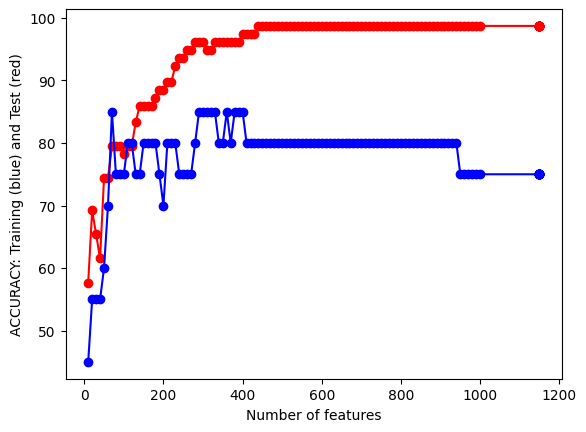

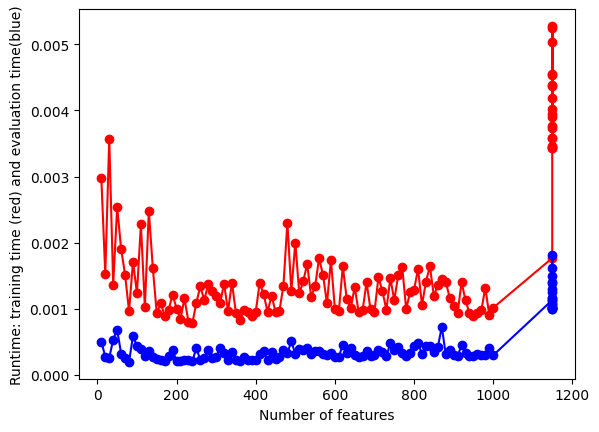

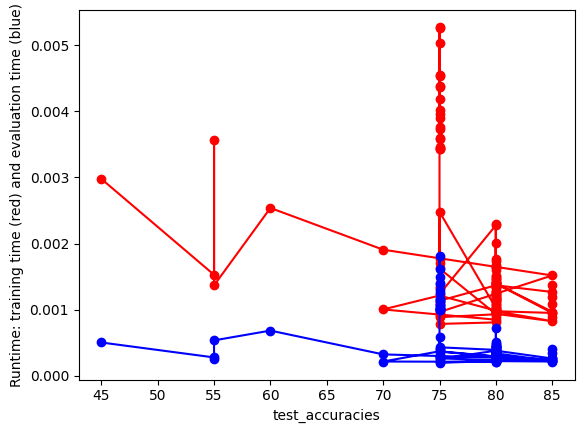

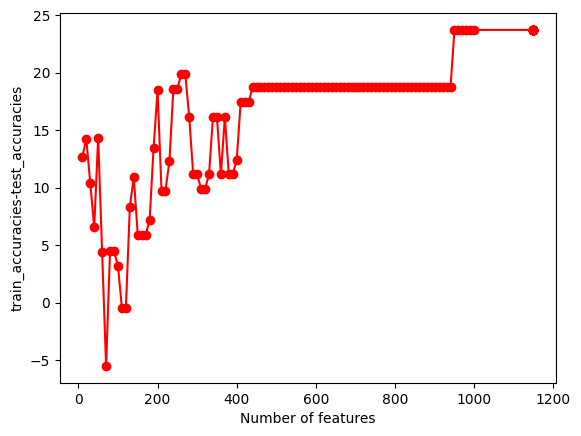

In [44]:
save_results("../NB/partial_grid_search")
plot_results("../NB/partial_grid_search")